Data analysis - Stackoverflow developer survey 2023

Loading dataframe

In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
survey_raw=pd.read_csv('stack-survey-2023\survey_results_public.csv')
survey_raw

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89179,89180,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Bootstrapping a business;Freelance/contr...,"Associate degree (A.A., A.S., etc.)",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN
89180,89181,I agree,I am a developer by profession,18-24 years old,"Student, full-time;Employed, part-time","Hybrid (some remote, some in-person)",School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Online Courses or Certification;Othe...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN
89181,89182,I agree,I code primarily as a hobby,Prefer not to say,I prefer not to say,NaN,NaN,Something else,Books / Physical media;Hackathons (virtual or ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN
89182,89183,I agree,I am a developer by profession,Under 18 years old,"Employed, part-time;Student, part-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Secondary school (e.g. American high school, G...",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,NaN


In [3]:
schema_raw=pd.read_csv('stack-survey-2023\survey_results_schema.csv')
schema_raw

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID310,Q310,"<div><span style=""font-size:19px;""><strong>You...",False,DB,TB
3,QID312,Q120,,True,MC,SAVR
4,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
...,...,...,...,...,...,...
73,QID289,Knowledge_7,Waiting on answers to questions often causes i...,NaN,MC,MAVR
74,QID289,Knowledge_8,I feel like I have the tools and/or resources ...,NaN,MC,MAVR
75,QID290,Frequency_1,Needing help from people outside of your immed...,NaN,MC,MAVR
76,QID290,Frequency_2,Interacting with people outside of your immedi...,NaN,MC,MAVR


Data preparation and cleaning :

In [4]:
survey_raw.columns


Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

In [5]:
selected_colm=['ResponseId','Age', 'Employment', 'RemoteWork','CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline','LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType','Country','Currency','LanguageHaveWorkedWith','LanguageWantToWorkWith', 'DatabaseHaveWorkedWith','DatabaseWantToWorkWith', 'PlatformHaveWorkedWith','PlatformWantToWorkWith', 'WebframeHaveWorkedWith','WebframeWantToWorkWith', 'MiscTechHaveWorkedWith','MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith','ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith','NEWCollabToolsWantToWorkWith', 'OpSysPersonal use','OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith','OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith','OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith','AISearchWantToWorkWith', 'AIDevHaveWorkedWith', 'AIDevWantToWorkWith', 'WorkExp']
len(selected_colm)

39

Creating a copy for further analysis :

In [6]:
survey_df=survey_raw[selected_colm].copy()
survey_df

,ResponseId,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,WorkExp
0,1,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,10.0
2,3,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,...,MacOS;Other Linux-based,Markdown File;Stack Overflow for Teams,Markdown File,Microsoft Teams;Slack;Zoom,Slack;Zoom,NaN,NaN,NaN,NaN,23.0
3,4,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,NaN,12,...,iOS;iPadOS;MacOS,Jira,Jira,Discord;Google Meet;Microsoft Teams;Slack;Zoom,Discord;Google Meet;Slack;Zoom,NaN,NaN,NaN,NaN,7.0
4,5,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,Other;Codecademy;edX,6,...,Other (Please Specify):,Confluence;Jira;Notion,Confluence;Jira;Notion,Discord;Google Meet;Slack;Zoom,Discord;Google Meet;Slack;Zoom,ChatGPT,ChatGPT,NaN,NaN,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89179,89180,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Bootstrapping a business;Freelance/contr...,"Associate degree (A.A., A.S., etc.)",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,Udemy,20,...,Android;Ubuntu;Windows,Asana;Confluence;Jira;Markdown File;Miro;Notio...,Markdown File;Miro;Wikis,Discord;Google Meet;Jitsi;Microsoft Teams;Slac...,Discord;Google Meet;Jitsi;Microsoft Teams;Tele...,ChatGPT,ChatGPT,Whispr AI,Whispr AI,NaN
89180,89181,18-24 years old,"Student, full-time;Employed, part-time","Hybrid (some remote, some in-person)",School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Online Courses or Certification;Othe...,Formal documentation provided by the owner of ...,NaN,5,...,Windows,Jira,Jira,Microsoft Teams,Microsoft Teams,ChatGPT,ChatGPT,NaN,NaN,NaN
89181,89182,Prefer not to say,I prefer not to say,NaN,NaN,Something else,Books / Physical media;Hackathons (virtual or ...,NaN,Codecademy;Coursera,10,...,NaN,NaN,NaN,NaN,NaN,ChatGPT;Quora Poe,ChatGPT;Quora Poe,NaN,NaN,NaN
89182,89183,Under 18 years old,"Employed, part-time;Student, part-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Secondary school (e.g. American high school, G...",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,Udemy,3,...,BSD;Red Hat;Solaris;Ubuntu;Windows,Confluence;Jira;Trello,Azure Devops;Confluence;Jira,Cisco Webex Teams;Discord;Microsoft Teams;Sign...,Discord;Microsoft Teams;Skype,Bing AI;ChatGPT;WolframAlpha,Bing AI;ChatGPT;Google Bard AI,NaN,NaN,NaN


In [7]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      89184 non-null  int64  
 1   Age                             89184 non-null  object 
 2   Employment                      87898 non-null  object 
 3   RemoteWork                      73810 non-null  object 
 4   CodingActivities                73764 non-null  object 
 5   EdLevel                         87973 non-null  object 
 6   LearnCode                       87663 non-null  object 
 7   LearnCodeOnline                 70084 non-null  object 
 8   LearnCodeCoursesCert            37076 non-null  object 
 9   YearsCode                       87435 non-null  object 
 10  YearsCodePro                    66136 non-null  object 
 11  DevType                         76872 non-null  object 
 12  Country                         

Age of Respondents : 

In [8]:
# Filtering out only number from sentence
regex = r'\d+(?:\.\d+)?"?(?:\s*[Xx/.]\s*\d+(?:\.\d+)?"?)?(?:\s*[A-Z]+\b)?'
df1 = survey_df['Age'].str.findall(regex).str.join('-')

# Checking numberical value and cleaning NaN value
df2=survey_df['Age'].str.extract('(\d+)')
newdf = df2.dropna()
age_index = newdf.index

df4=df1[age_index]
Ttl_count=df4.value_counts()

print(Ttl_count)

25-34    33247
35-44    20532
18-24    17931
45-54     8334
18        4128
55-64     3392
65        1171
Name: Age, dtype: int64


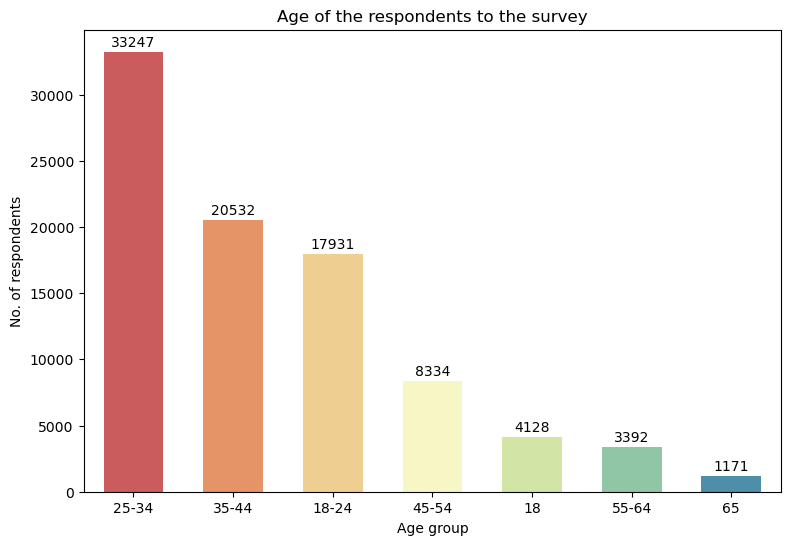

In [9]:
#Plotting graph
plt.figure(figsize=(9,6))
plt.title('Age of the respondents to the survey')

ax=sns.barplot(y=Ttl_count,x=Ttl_count.index,width=0.6,palette ="Spectral",);

ax.bar_label(ax.containers[0],padding=2,)
plt.xlabel('Age group')
plt.ylabel('No. of respondents');


Number of years spent in coding in Total  :

In [10]:
#Converting to numerical dtype
cal1=pd.to_numeric(survey_df.YearsCode, errors ='coerce').dropna() 
cal2=pd.to_numeric(survey_df.YearsCodePro, errors ='coerce').dropna()


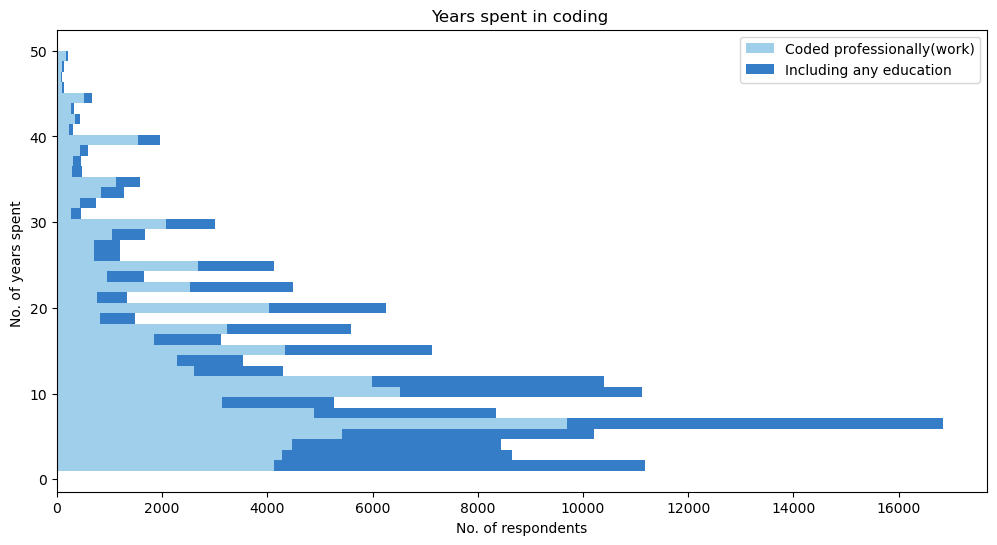

In [11]:
#Plotting graph
plt.figure(figsize=(12,6))
ax=plt.hist([cal1,cal2],bins=40,stacked=True,color=['#A0CFEC','#357EC7'],orientation='horizontal');

plt.legend(['Coded professionally(work)','Including any education',])
plt.title('Years spent in coding ')
plt.ylabel('No. of years spent ')
plt.xlabel('No. of respondents')
plt.show();


Countries of respondents :

In [12]:
#Total no. of country 
survey_df.Country.value_counts()

United States of America                                18647
Germany                                                  7328
India                                                    5625
United Kingdom of Great Britain and Northern Ireland     5552
Canada                                                   3507
                                                        ...  
Saint Kitts and Nevis                                       1
Marshall Islands                                            1
Samoa                                                       1
Central African Republic                                    1
San Marino                                                  1
Name: Country, Length: 185, dtype: int64

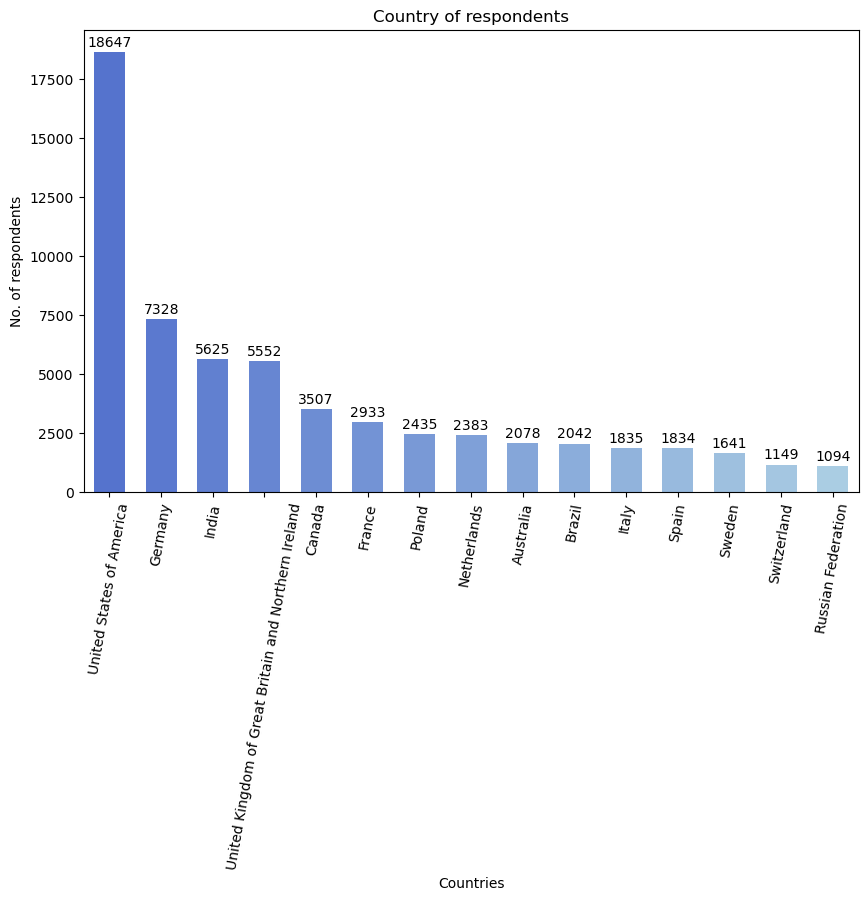

In [13]:
#Selecting top 15 countries 
top_countries=survey_df.Country.value_counts().head(15)

#Plotting graph
plt.figure(figsize=(10,6))
plt.title('Country of respondents')

ax=sns.barplot(y=top_countries,x=top_countries.index,width=0.6,palette ="blend:#4169E1,#A0CFEC",);

ax.bar_label(ax.containers[0],padding=2,)
plt.xticks(rotation=80)
plt.xlabel('Countries')
plt.ylabel('No. of respondents');

Highest level of formal education completed by respondents :

In [14]:
#Type of education level 
survey_df.EdLevel.value_counts()

#Converting into % format and rounding upto two decimal points
edlevel=(survey_df.EdLevel.value_counts()*100)/survey_df.EdLevel.count()

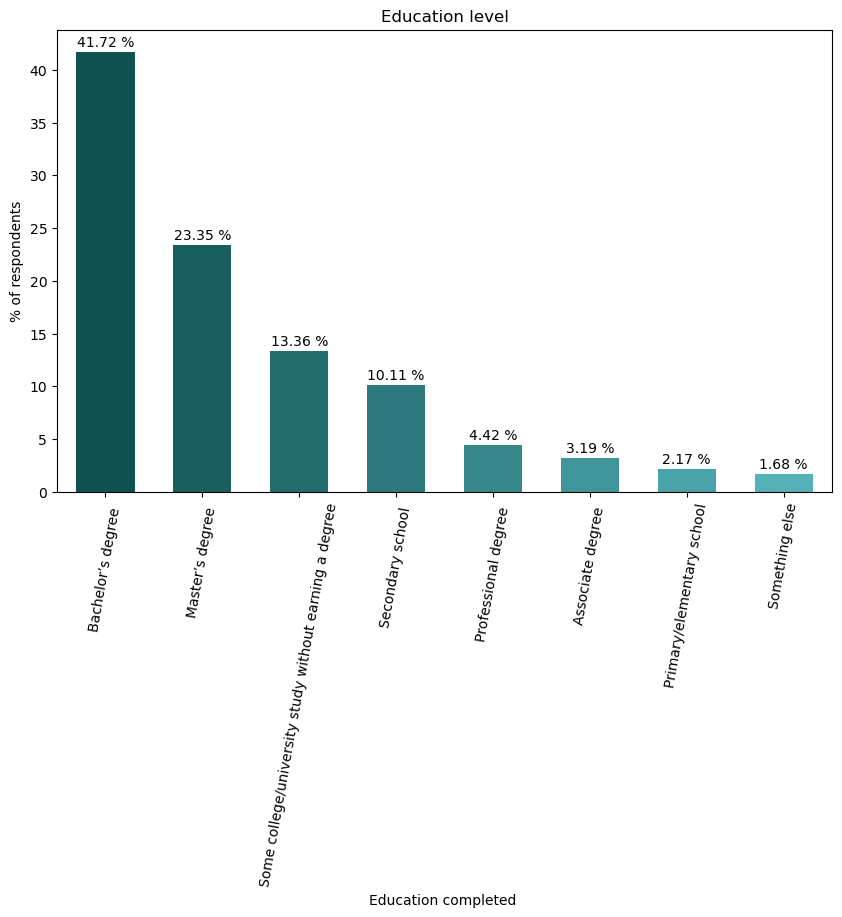

In [15]:
#Plotting graph
plt.figure(figsize=(10,6))
plt.title('Education level')

# remove all parentheses and data inside it.
x_pt=edlevel.index.str.replace(r"\(.*\)",'', regex=True)

ax=sns.barplot(y=edlevel,x=x_pt,width=0.6,palette ="blend:#045D5D,#43BFC7",);

ax.bar_label(ax.containers[0], fmt='{:,.2f} %',padding=2,)

plt.xticks(rotation=80)
plt.xlabel('Education completed ')
plt.ylabel('% of respondents');

Employment type of respondents :

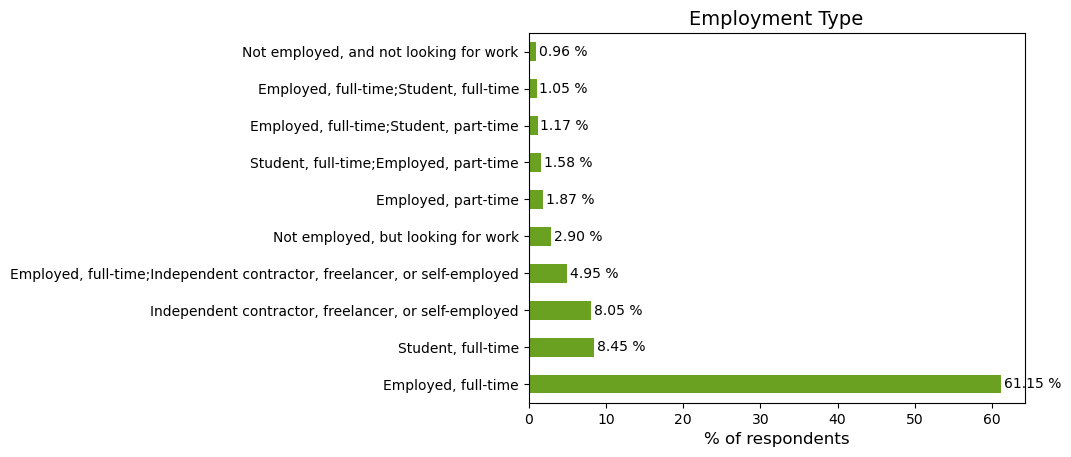

In [16]:
emp=((survey_df.Employment.value_counts(normalize=True,))*100).head(10)

ax=emp.plot(kind='barh',color='#6AA121');


ax.bar_label(ax.containers[0], fmt='{:,.2f} %',padding=2,)
plt.title('Employment Type', fontsize=14)
plt.xlabel('% of respondents', fontsize=12);


Developer type of the respondents :

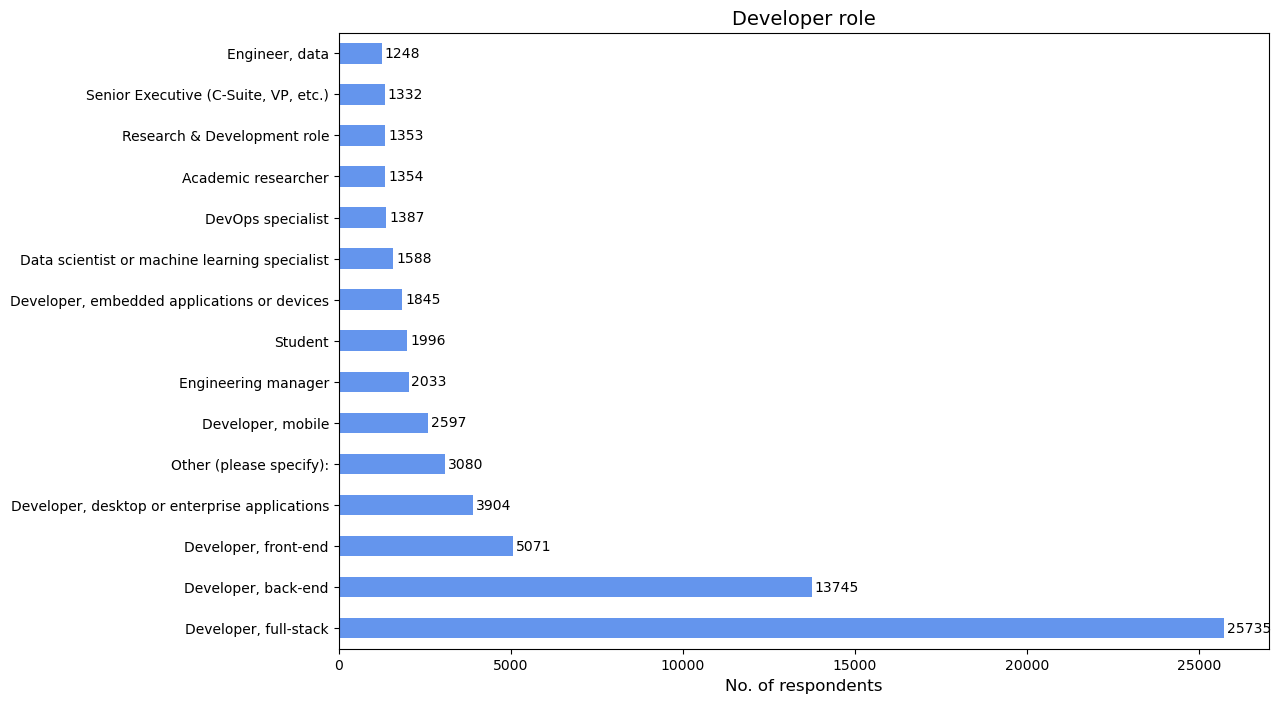

In [17]:
dev=survey_df.DevType.value_counts().head(15)

plt.figure(figsize=(12,8))

ax=dev.plot(kind='barh',color='#6495ED');

ax.bar_label(ax.containers[0],padding=2,);
plt.title('Developer role', fontsize=14)
plt.xlabel('No. of respondents', fontsize=12);   



Most used/famous programming language used by respondents :

1.  Programming language respondents have worked with 

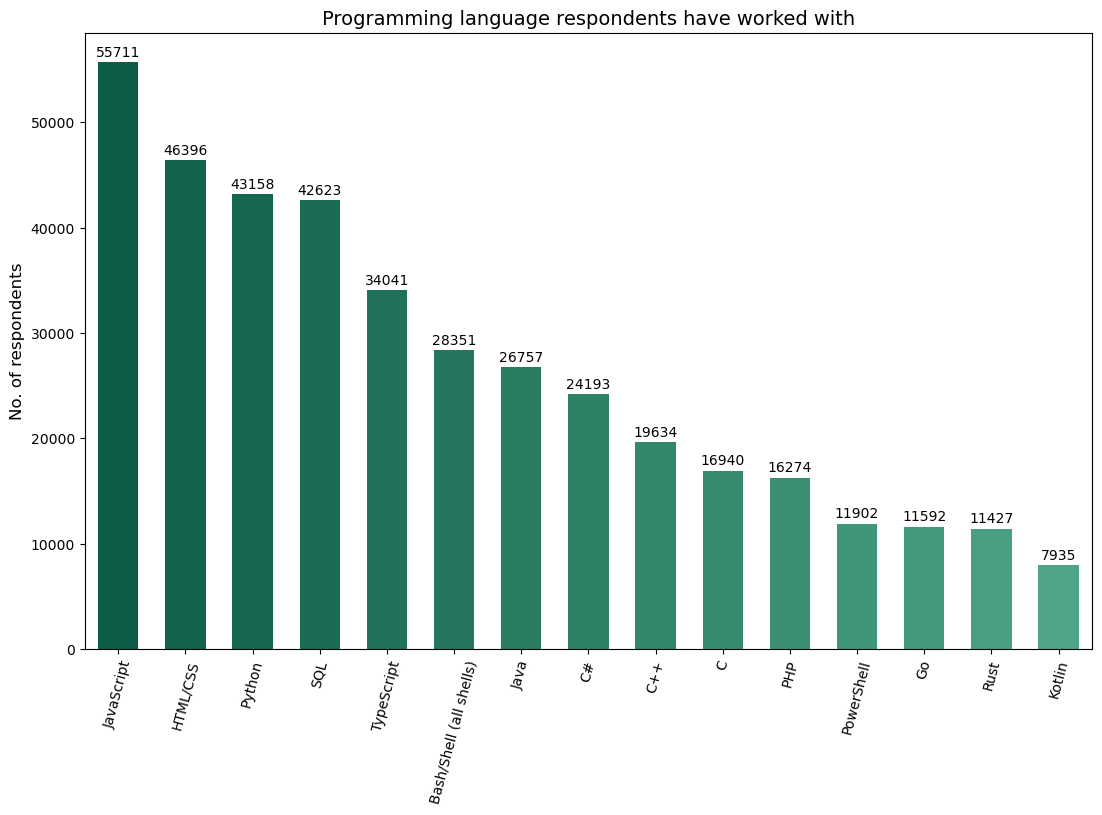

In [18]:
#Splitting Multiple chioce into single text
lan=survey_df.LanguageHaveWorkedWith.str.split(';')
lan1 = lan.explode('Column')

#Selecting top 15
one_lang=lan1.value_counts().head(15)

#Plotting graph
plt.figure(figsize=(13,8))

ax=sns.barplot(y=one_lang,x=one_lang.index,width=0.6,palette ="blend:#006A4E,#3EB489",);


ax.bar_label(ax.containers[0],padding=2,);
plt.xticks(rotation=75)
plt.title(' Programming language respondents have worked with ', fontsize=14)
plt.ylabel('No. of respondents', fontsize=12);  


2.  Programming language respondents would like to work with :

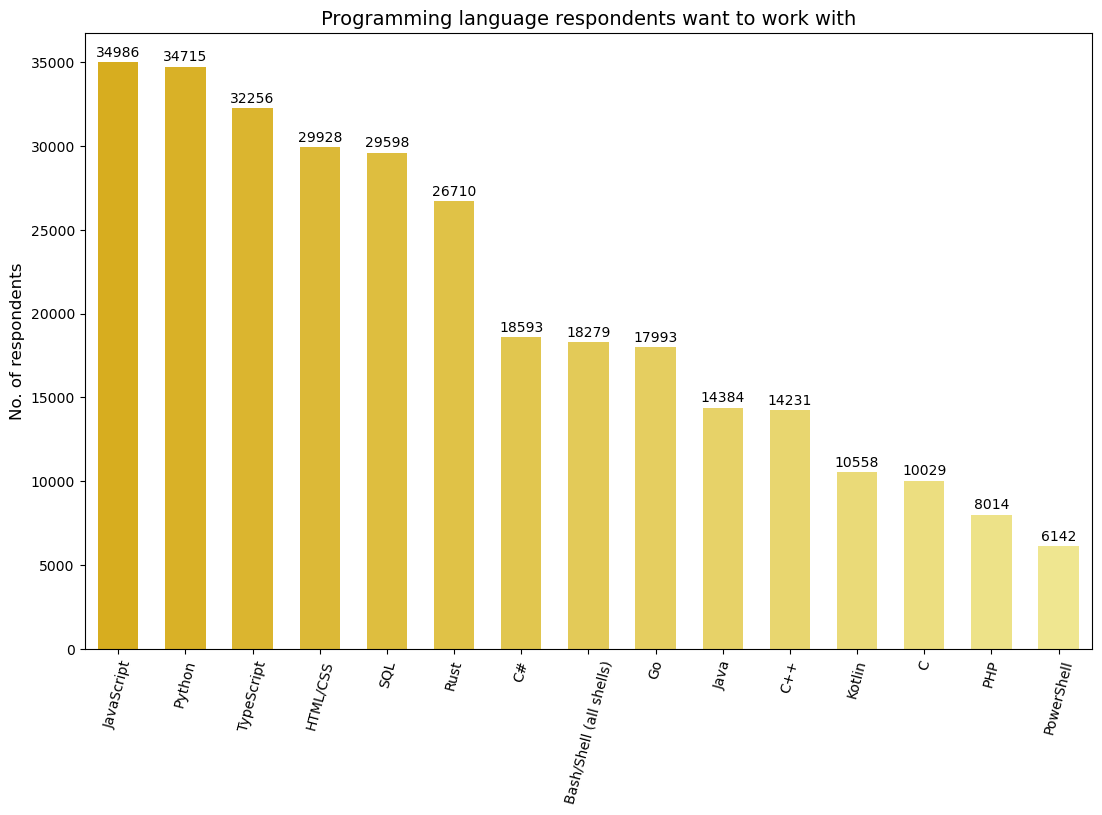

In [19]:
#Splitting Multiple chioce into single text
lan2=survey_df.LanguageWantToWorkWith.str.split(';')
lan3 = lan2.explode('Column')

#Selecting top 15
one_lang1=lan3.value_counts().head(15)

#Plotting graph
plt.figure(figsize=(13,8))

ax=sns.barplot(y=one_lang1,x=one_lang1.index,width=0.6,palette ="blend:#F6BE00,#FFF380",);


ax.bar_label(ax.containers[0],padding=2,);
plt.xticks(rotation=75)
plt.title(' Programming language respondents want to work with ', fontsize=14)
plt.ylabel('No. of respondents', fontsize=12);  


3. Relation between both like to work and already have worked with programing language

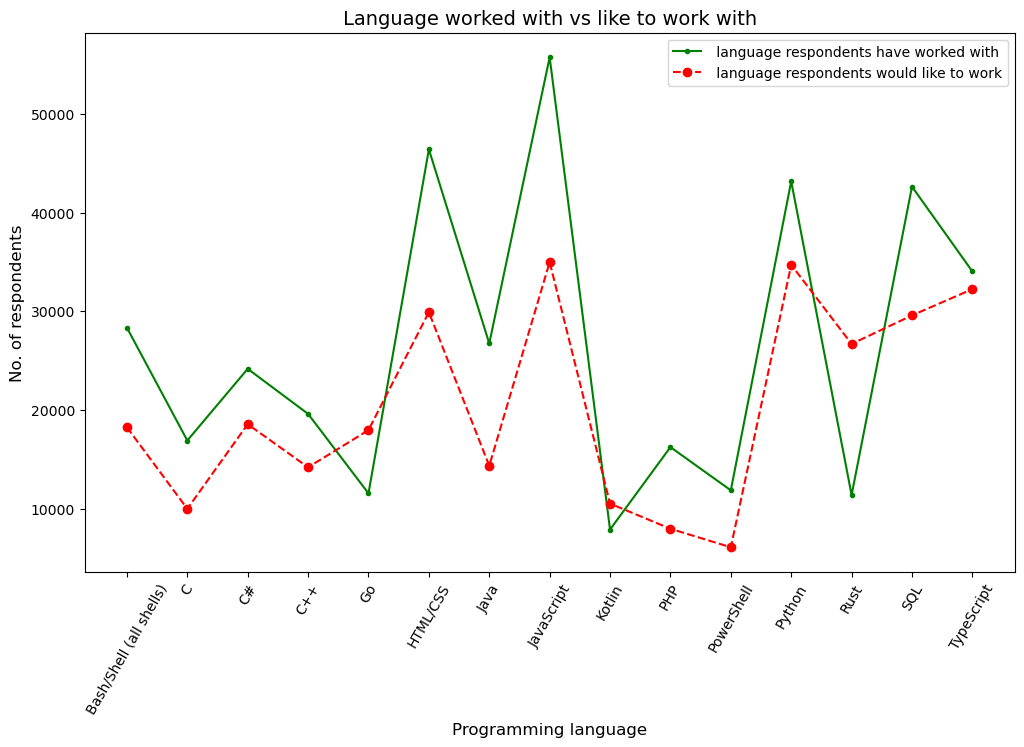

In [20]:
#Filtering out colu both like to work and worked with language
love_lang=one_lang&one_lang1

plt.figure(figsize=(12,7))
#print(love_lang.index)
pt1=one_lang[love_lang.index]
pt2=one_lang1[love_lang.index]
plt.plot(pt1.index, pt1,'.-g')
plt.plot(pt2.index, pt2,'o--r')

plt.xticks(rotation=60)
plt.title(' Language worked with vs like to work with ', fontsize=14)
plt.xlabel('Programming language', fontsize=12);  
plt.ylabel('No. of respondents', fontsize=12);  
plt.legend([' language respondents have worked with',' language respondents would like to work'])
plt.show()